# GraphABCD

First, include some libraries

In [19]:
# Run boilerplate code to set up environment
import copy

%run ../prelude.py --style=tree+uncompressed --animation=movie

interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

## Create a graph

Create a vertices array and adjacency matrix (source to destination

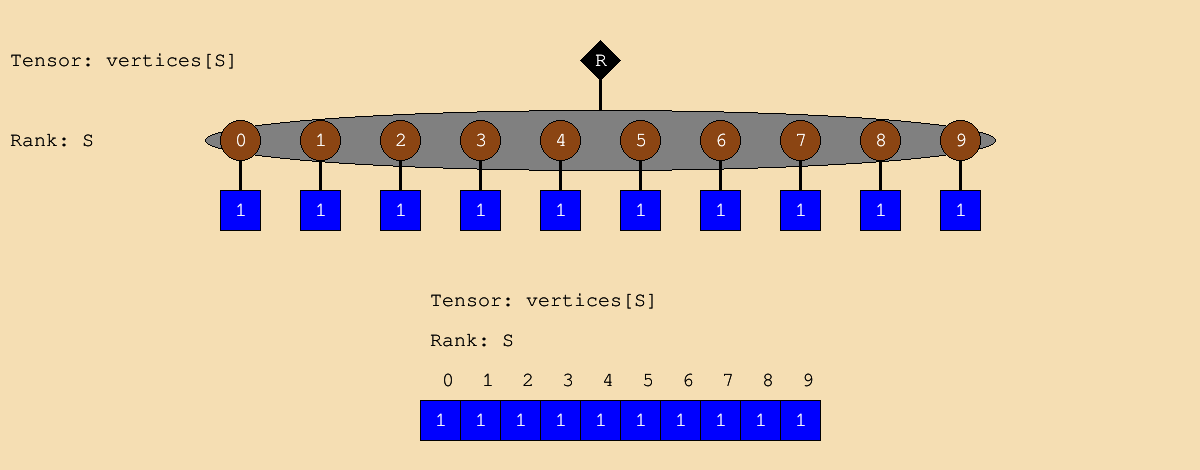

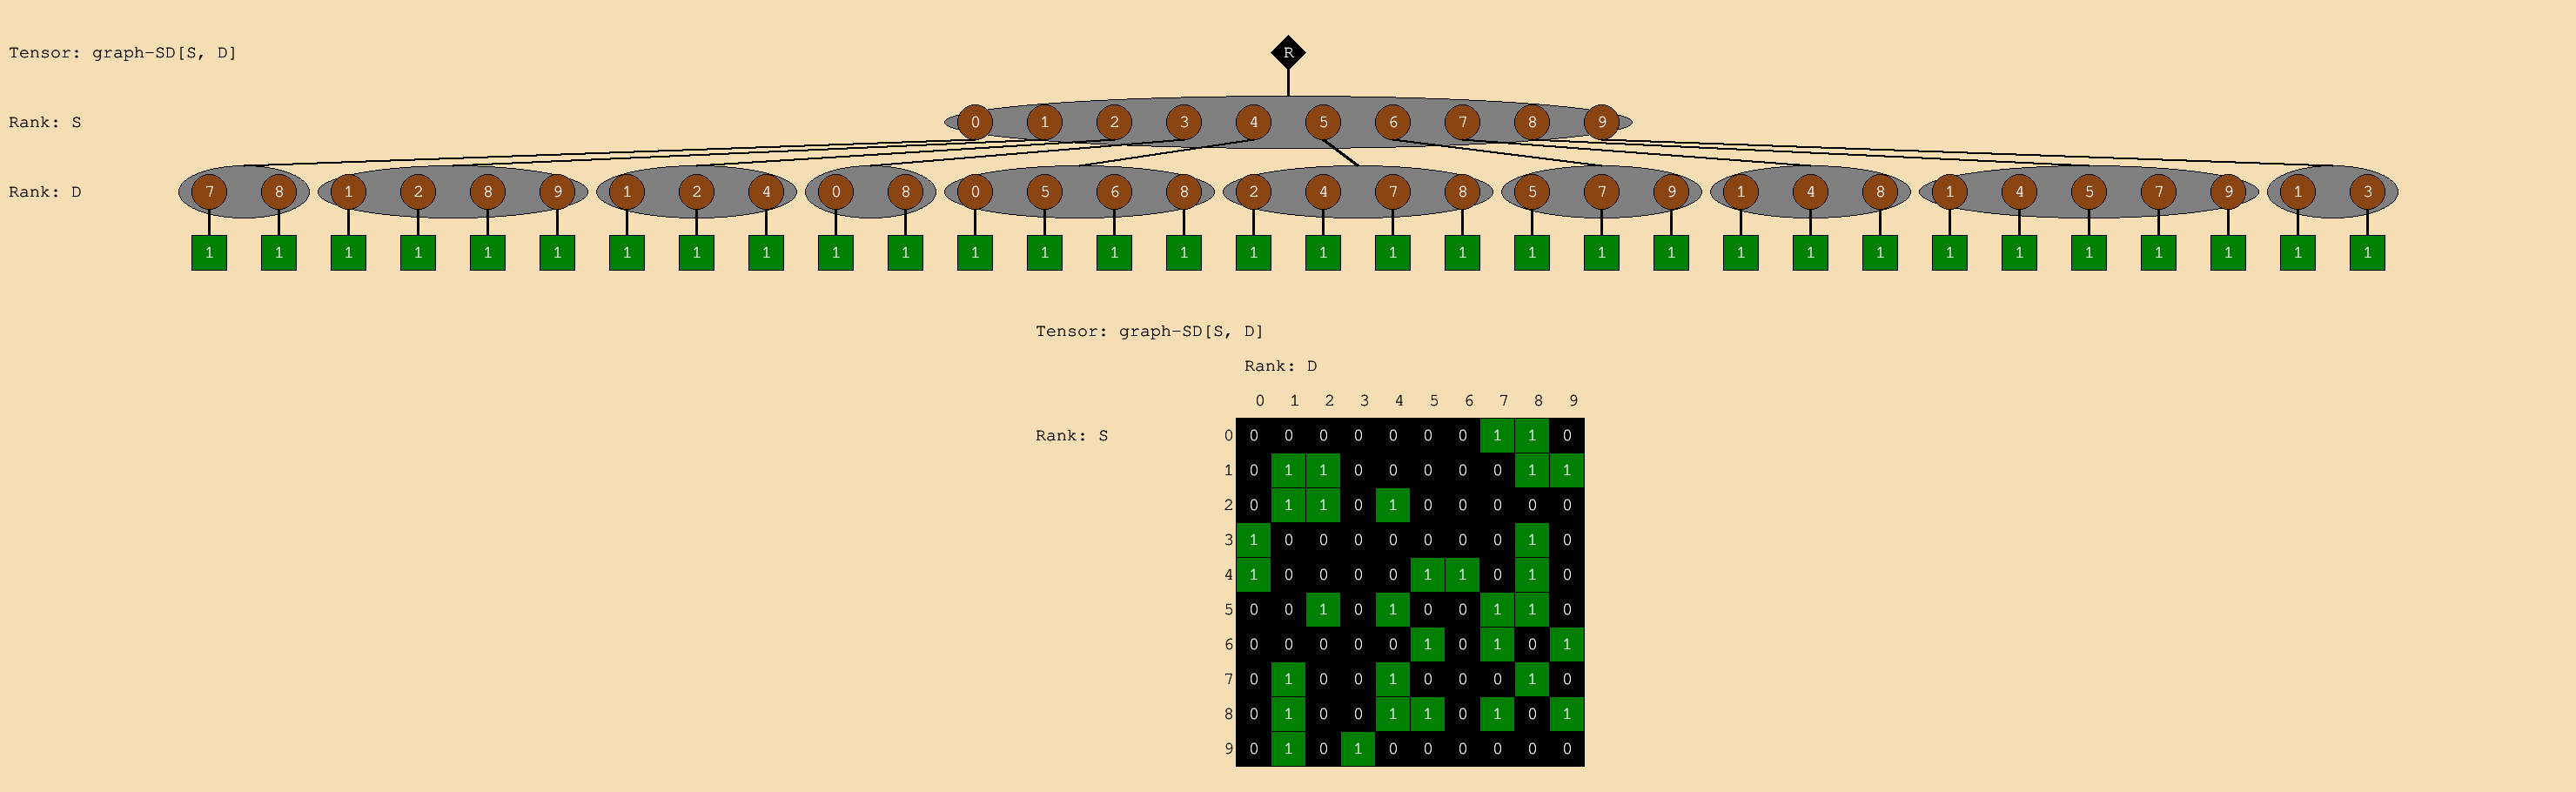

Graph


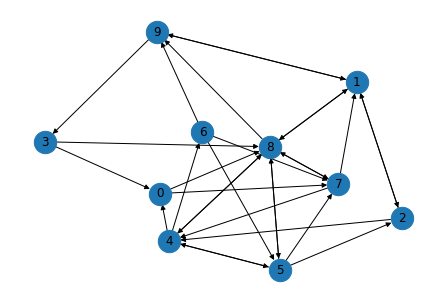

In [2]:
S = 10
D = S

#vertex = Tensor.fromRandom(["S"], [S], (1.0,), 9, seed=10)
vtx = Tensor.fromUncompressed(["S"], [1]*S)
vtx.setMutable(True).setColor("blue").setName("vertices")

g_SD = Tensor.fromRandom(["S", "D"], [S, D], (1.0, 0.28), 1, seed=100)
g_SD.setMutable(True).setColor("green")
g_SD.setName("graph-SD")

displayTensor(vtx)
displayTensor(g_SD)
                         
print("Graph")
displayGraph(g_SD.getRoot())


## Create reverse adjacency matrix (destination to source)

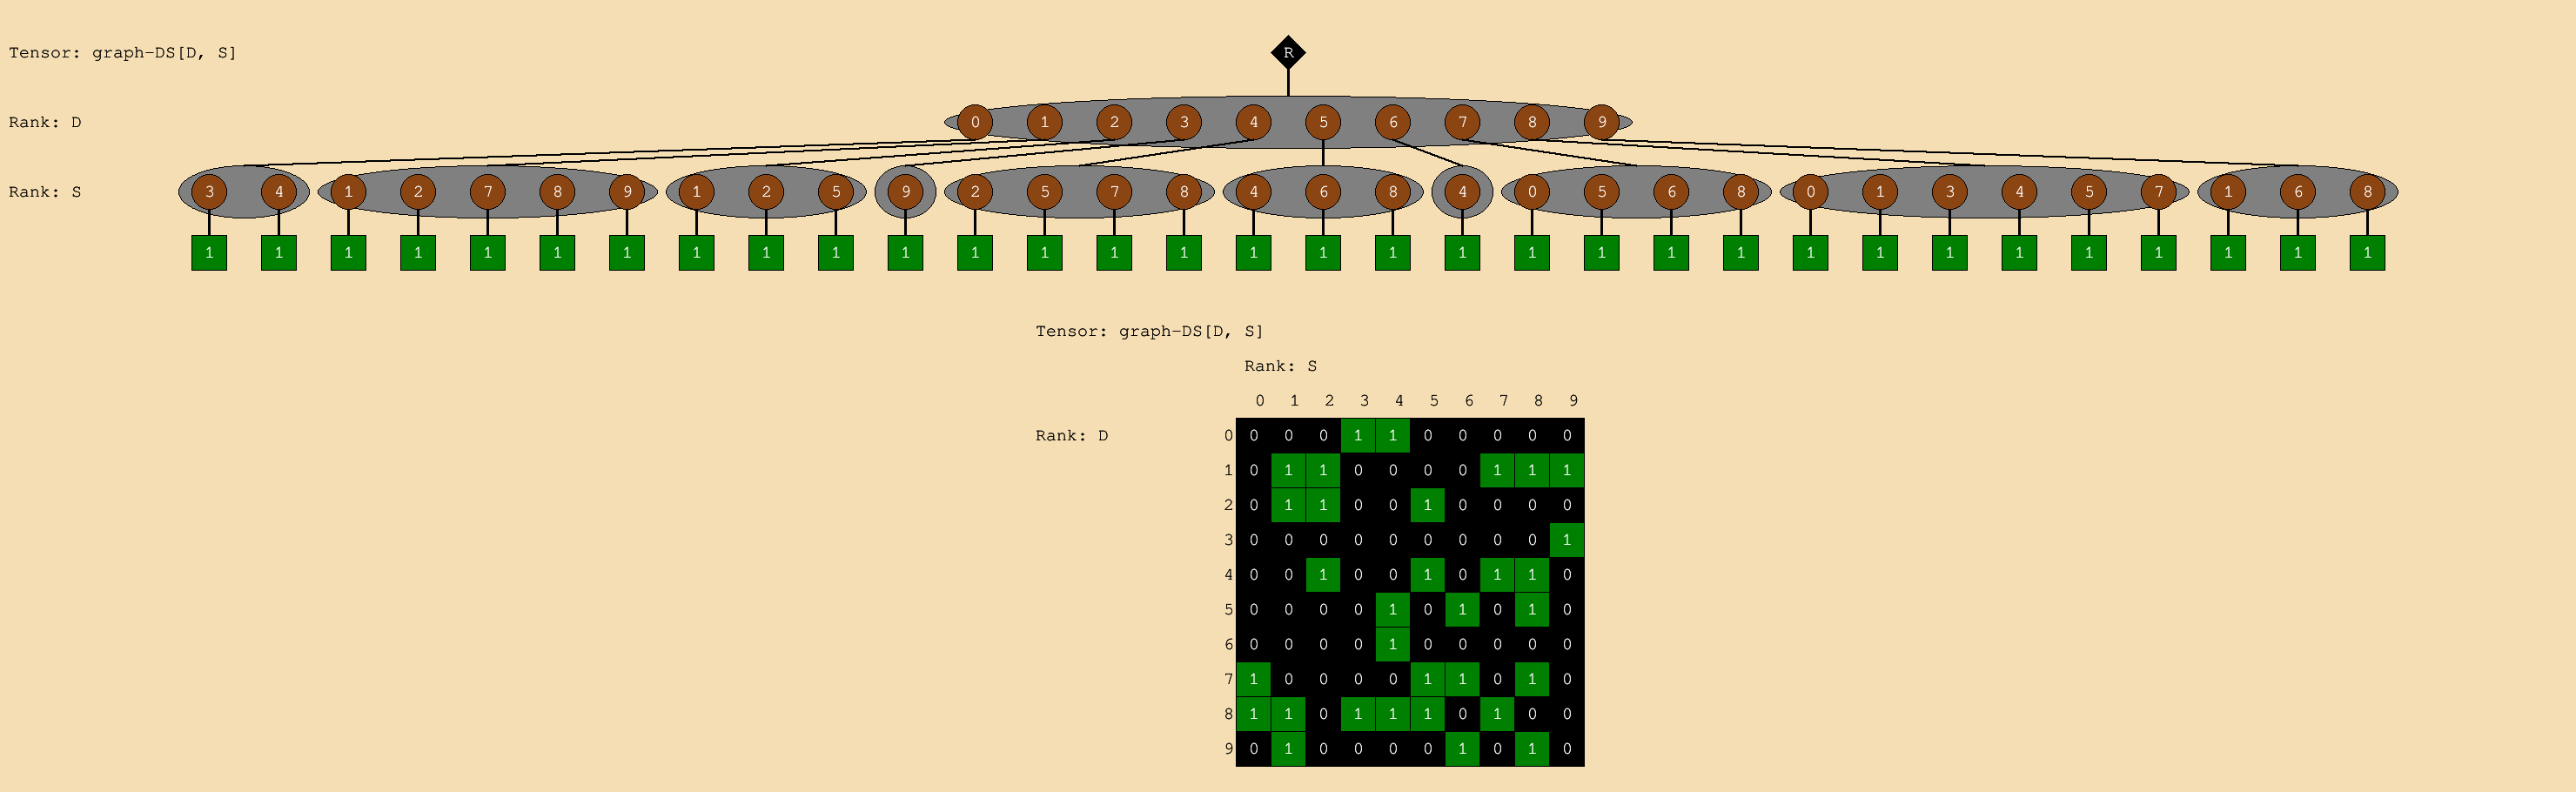

In [3]:
g_DS = g_SD.swapRanks()
g_DS.setMutable(True).setColor("green")
g_DS.setName("graph-DS")

displayTensor(g_DS)



## Create scatter map tensor

Create a tensor with rank order S, D whose value is the position of a source vertex in the graph.


In [17]:
def create_scatter_map(g_XX):
    sm = g_XX.swapRanks()
    sm.setMutable(True).setColor("purple")
    sm.setName(g_XX.getName()+"-scattermap")

    canvas = createCanvas(g_XX, sm) if enable["scatter_map"] else None
    
    sm_r1 = sm.getRoot()

    for r1, sm_r0 in sm_r1:
        for r0, sm_ref in sm_r0:
            p = g_XX.getRoot().getPayload(r0).getPosition(r1)
            sm_ref <<= (p,)
            if enable["scatter_map"]:
                canvas.addFrame((r0, r1), (r1, r0))

    displayCanvas(canvas)
    
    return sm

createEnableControl("scatter_map")

interactive(children=(Dropdown(description='scatter_map', options=(False, True), value=False), Output()), _dom…

## Create scatter maps

  0%|          | 0/34 [00:00<?, ?it/s]

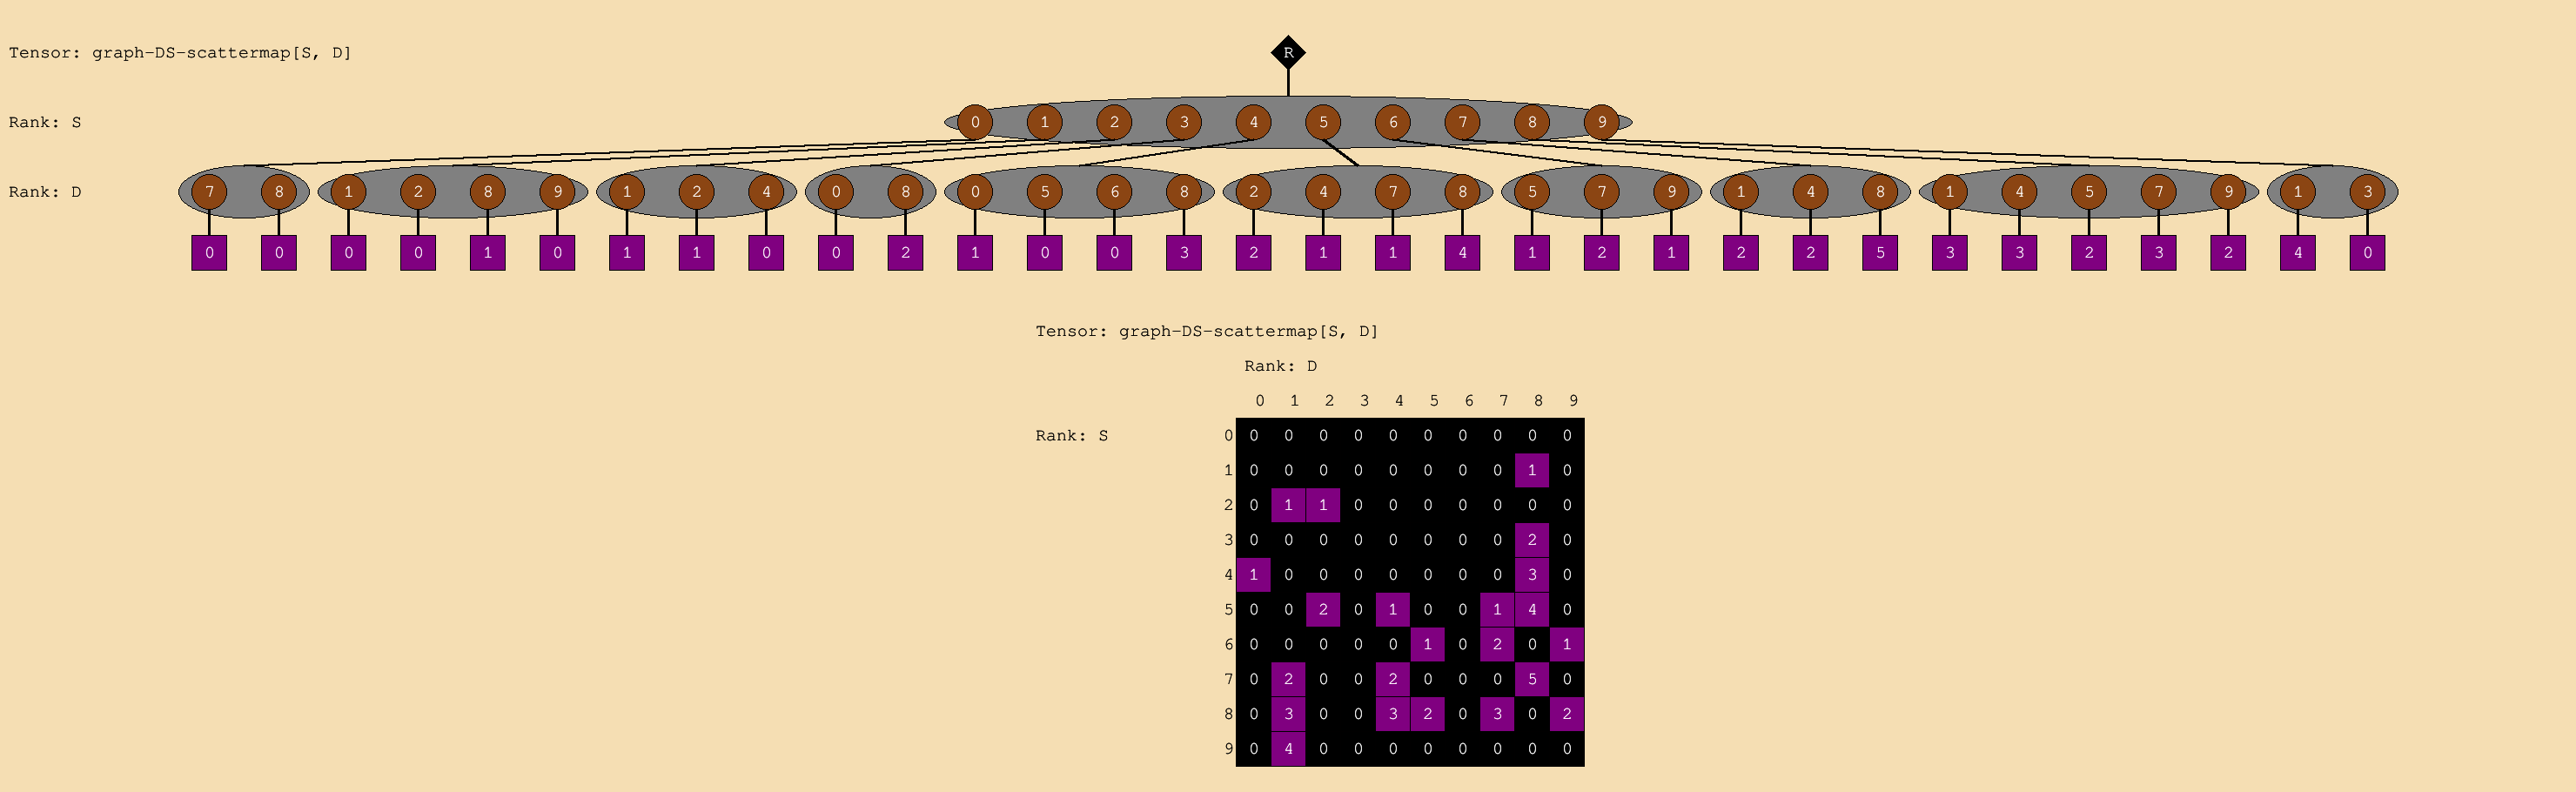

  0%|          | 0/34 [00:00<?, ?it/s]

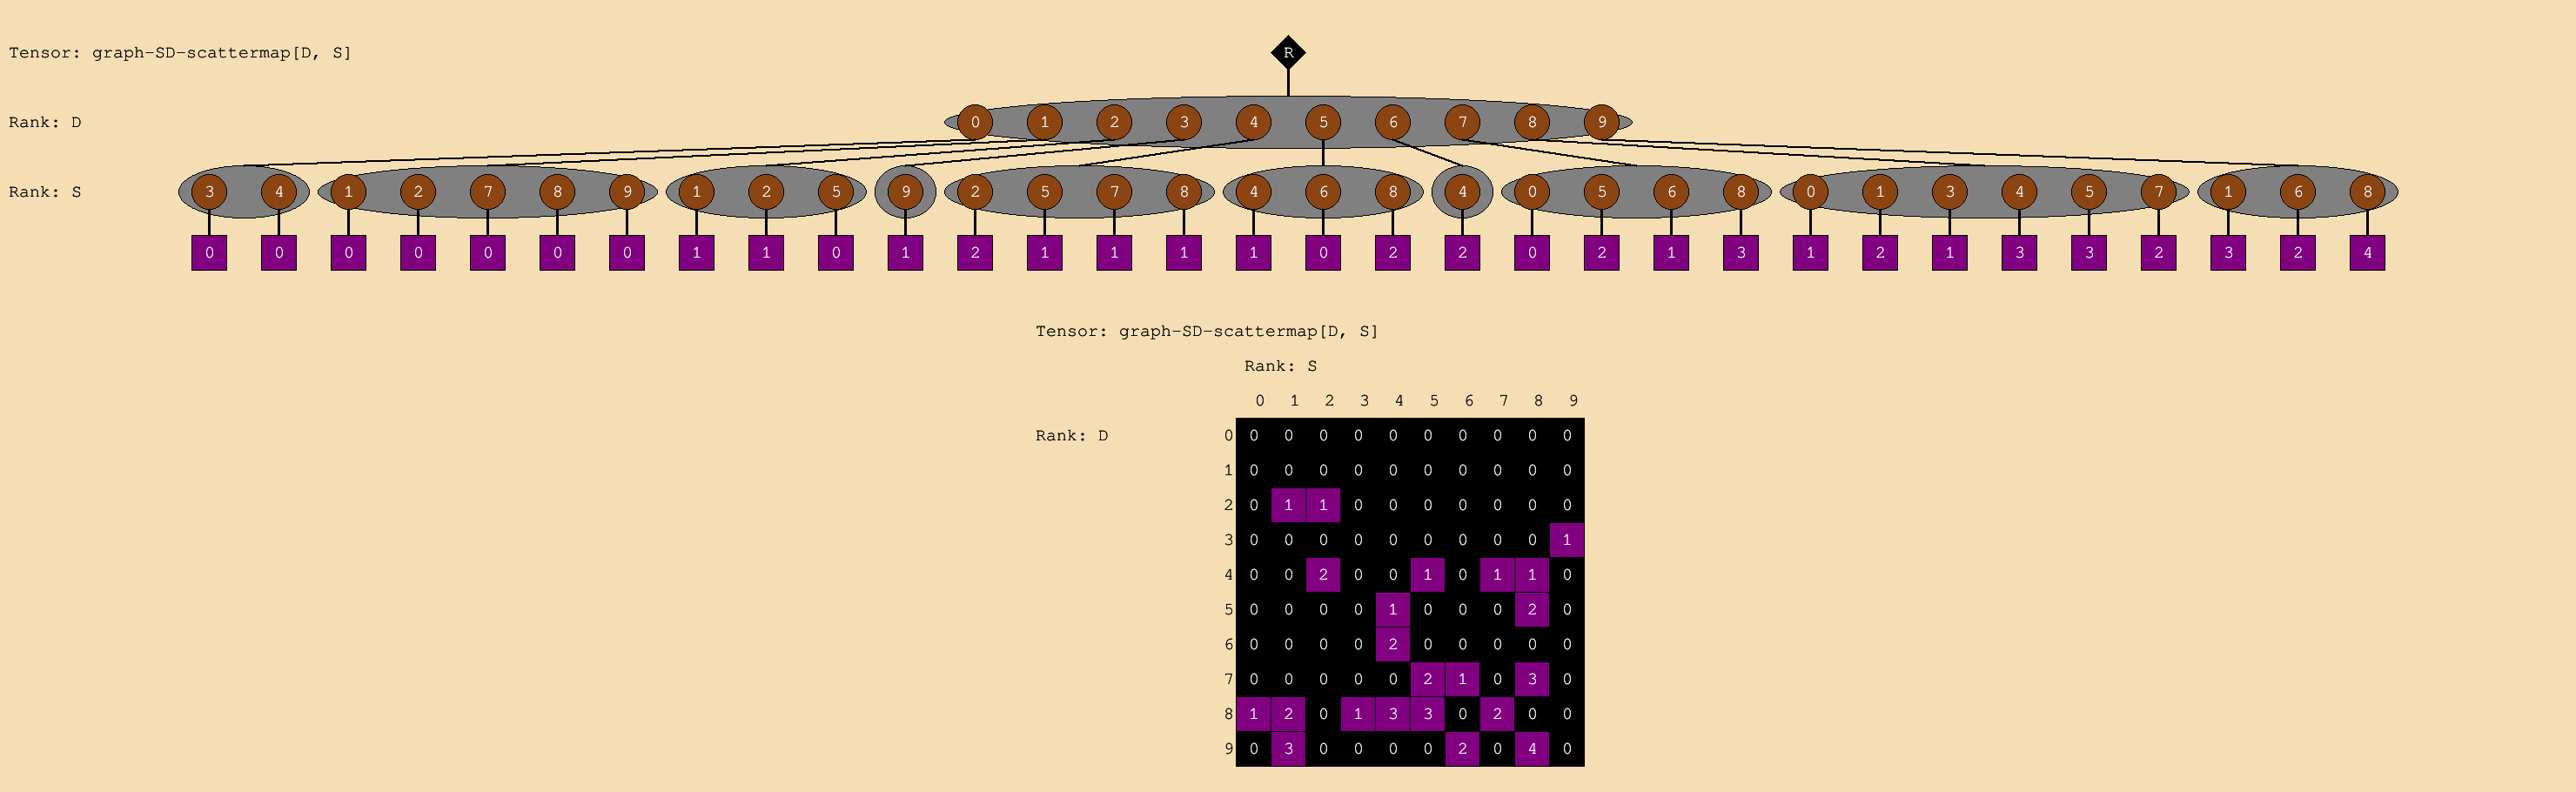

In [20]:
# create DS scatter map
sm_DS = create_scatter_map(g_DS)

displayTensor(sm_DS)

# create SD scatter map
sm_SD = create_scatter_map(g_SD)

displayTensor(sm_SD)

## Scatter the vertex data into the graph

In [9]:
def scatter(g_XX, sm_XX):
    
    vtx_s = vtx.getRoot()
    sm_r1 = sm_XX.getRoot()
    g_r1 = g_XX.getRoot()
    
    canvas = createCanvas(vtx, sm_XX,g_XX)if enable["scatter"] else None
    
    for r1, (vtx_val, sm_r0) in vtx_s & sm_r1:
        for r0, (g_r0, sm_val) in g_r1 << sm_r0:
            # TBD: Fix so getitem takes a Payload
            g_r0[sm_val.value[0]] = copy.deepcopy(vtx_val)

            if enable["scatter"]:
                canvas.addFrame((r1,), (r1, r0), (r0, r1))

    displayCanvas(canvas)
    
# Display control

createEnableControl("scatter")


interactive(children=(Dropdown(description='scatter', options=(False, True), value=False), Output()), _dom_cla…

## Example application of scatter

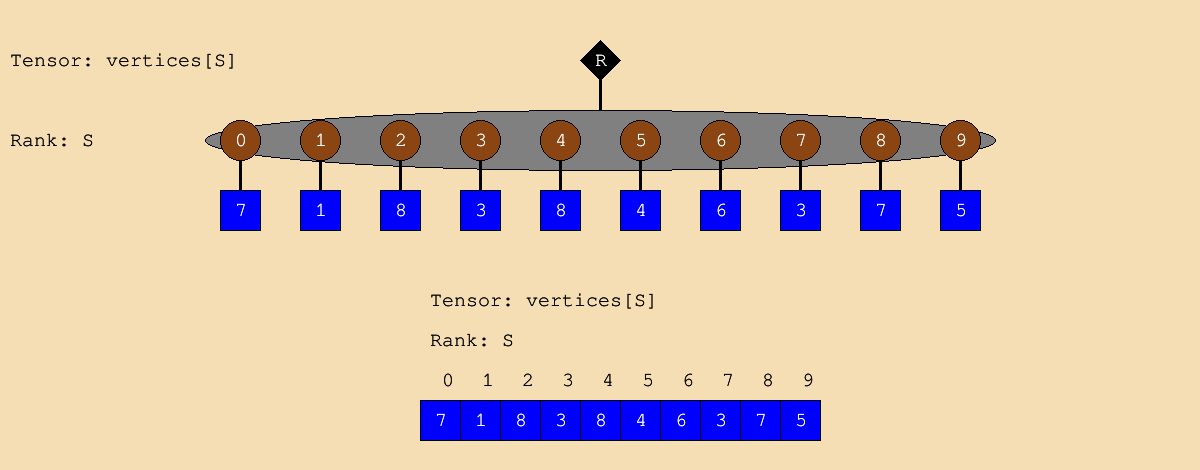

Before


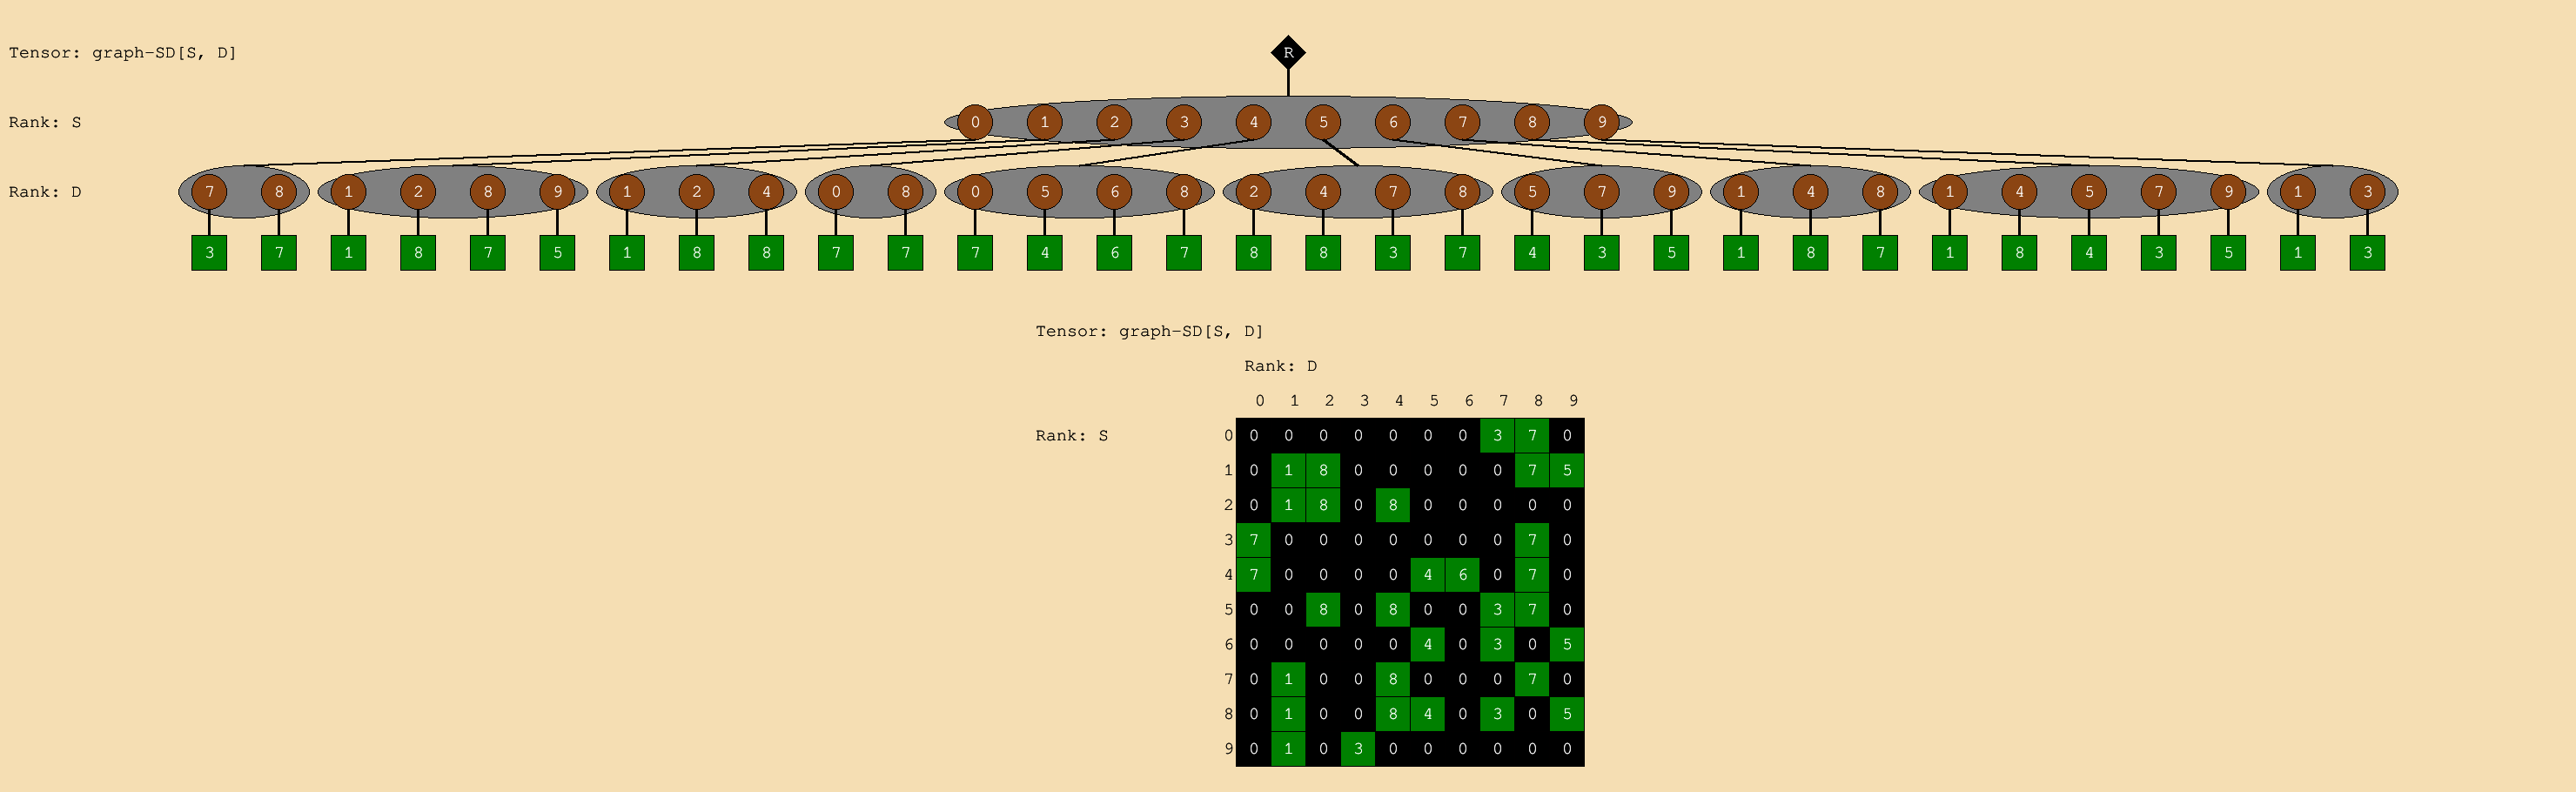

  0%|          | 0/34 [00:00<?, ?it/s]

After


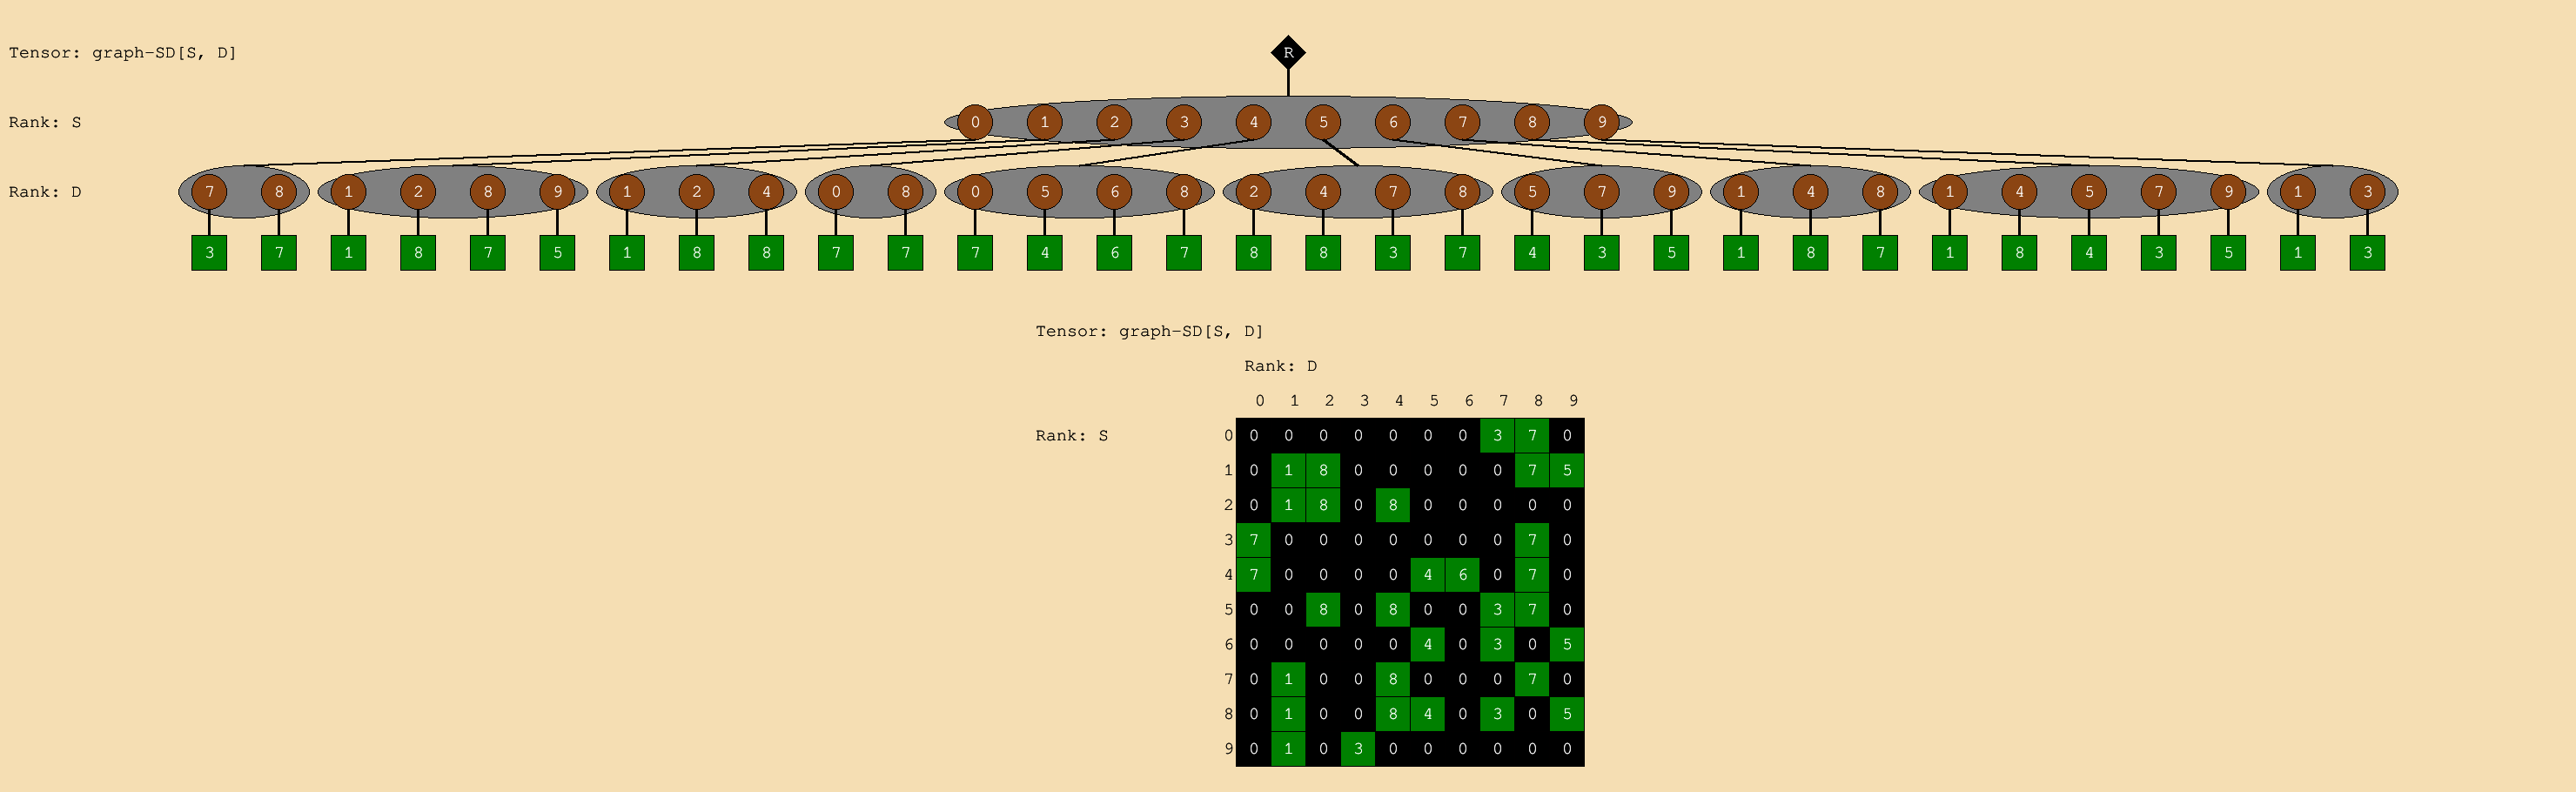

In [21]:
#
# Example of application of scatter
#
vtx = Tensor.fromRandom(["S"], [S], (1.0,), 9, seed=10)
vtx.setMutable(True).setColor("blue").setName("vertices")
displayTensor(vtx)

print("Before")
displayTensor(g_SD)

scatter(g_SD, sm_SD)

print("After")
displayTensor(g_SD)

## Create an gather/apply function

In [13]:
import copy

def gather_apply(vtx, g_XX, update):
    
    changed = False
    
    vtx_old = copy.deepcopy(vtx)
    vtx_old.setName(vtx.getName()+"-old")

    # Treat the vtx values as same rank as top rank of g_XX
    
    vtx_old_r1 = vtx_old.getRoot()
    vtx_r1 = vtx.getRoot()   
    g_r1 = g_XX.getRoot()
    
    canvas = createCanvas(vtx_old, g_XX, vtx) if enable["apply"] else None
    
    for r1, (vtx_ref, (vtx_val, g_r0)) in vtx_r1 << (vtx_old_r1 & g_r1):
        for r0, g_val in g_r0:
            if r0 == r1: continue
                
            new_vtx_val = update(vtx_val, g_val, r1=r1, r0=r0)
    
            if new_vtx_val is not None:
                changed = True
                vtx_ref.value = new_vtx_val
                vtx_highlight = (r1,)
            else:
                vtx_highlight = ()

            if enable["apply"]:
                canvas.addFrame((r1,), (r1, r0), (r1,))

    displayCanvas(canvas)
    
    return changed

# Display control

createEnableControl("apply")

interactive(children=(Dropdown(description='apply', options=(False, True), value=False), Output()), _dom_class…

## SSSP - DS form

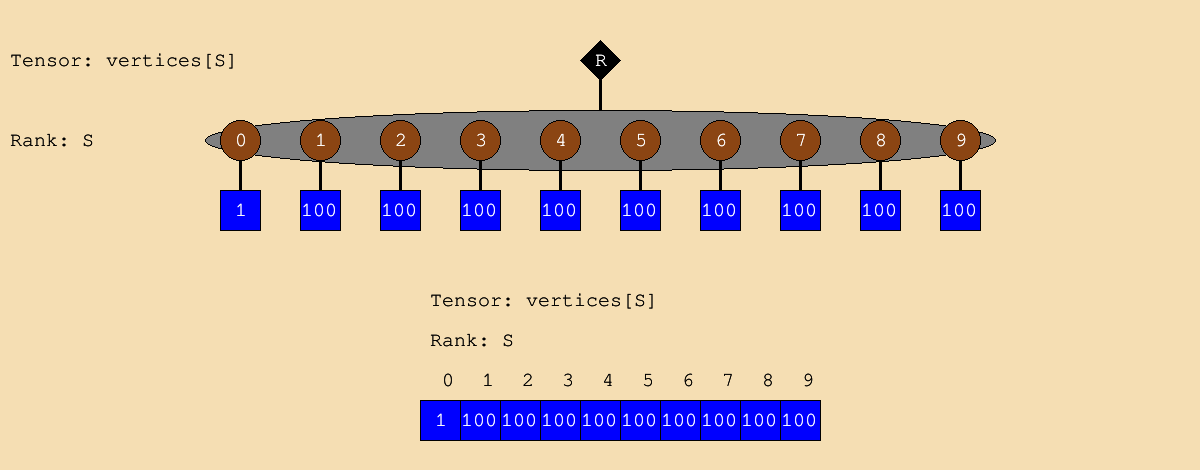

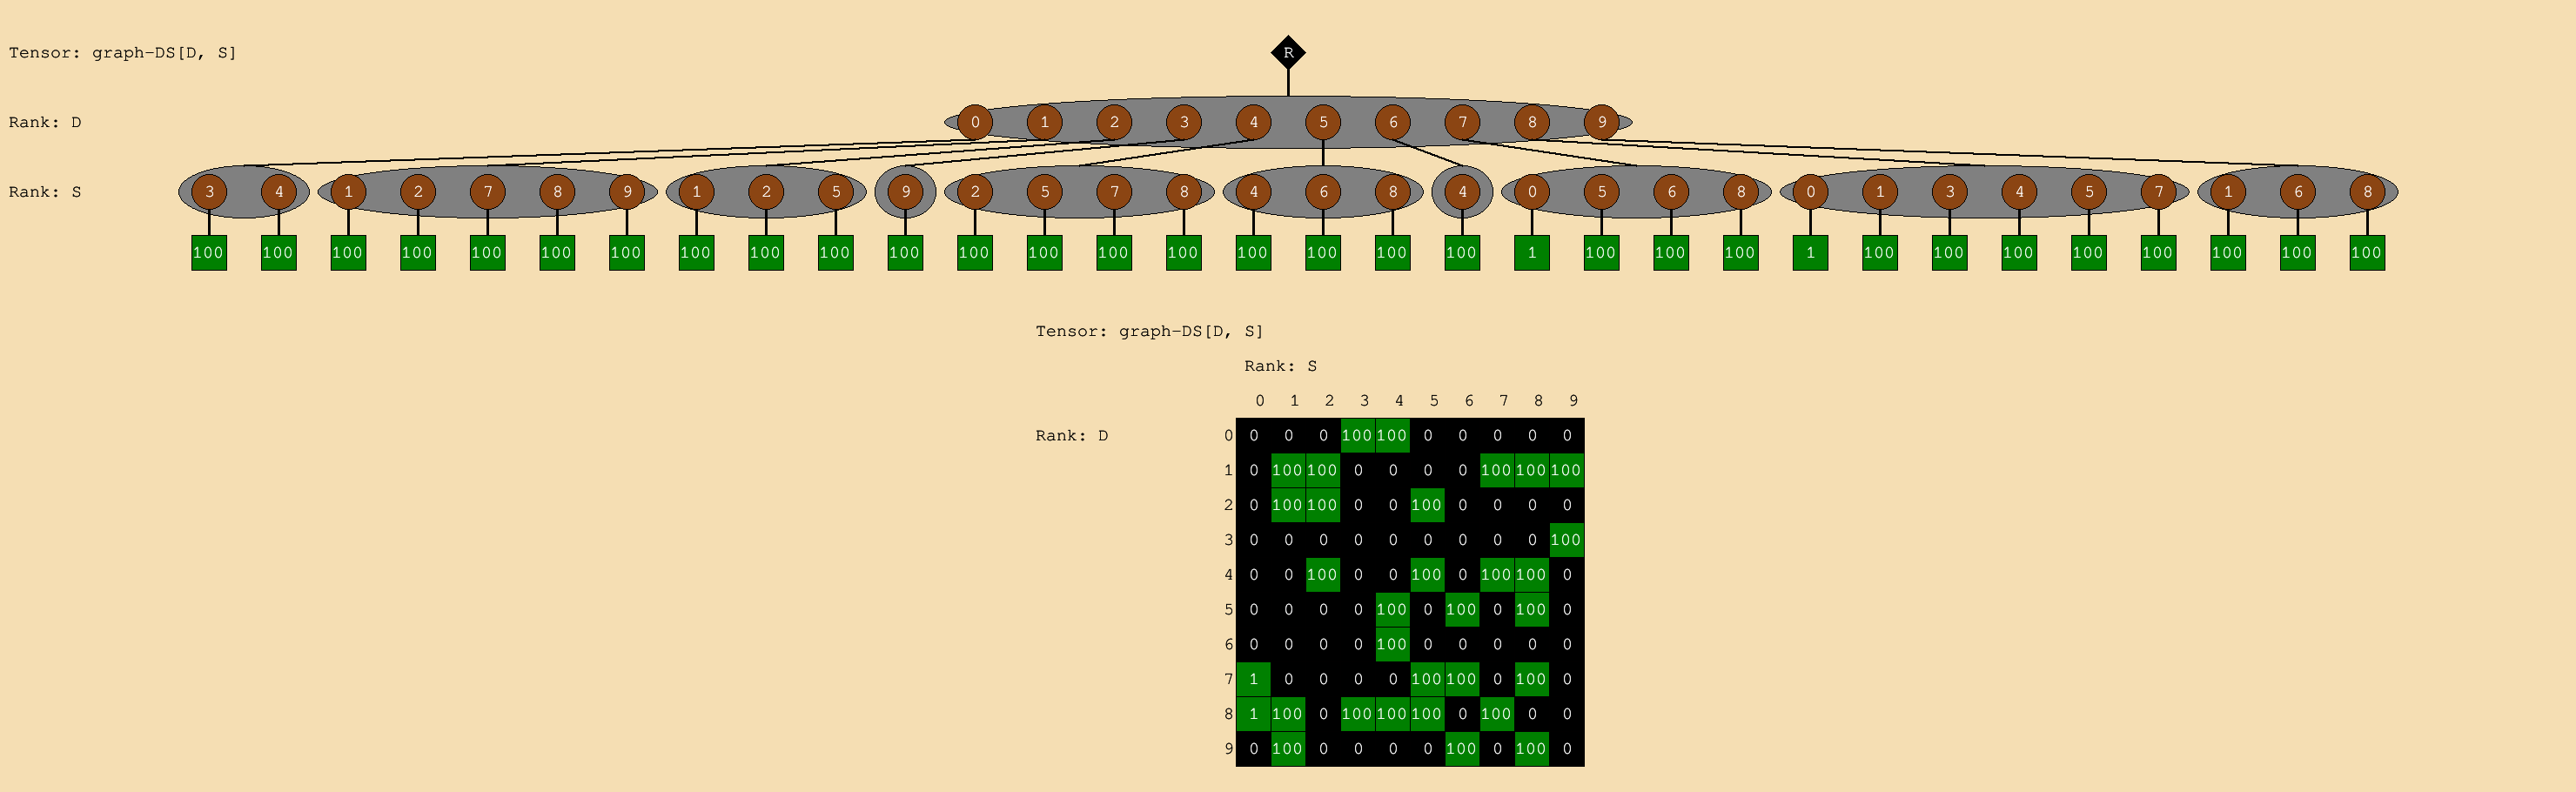

Generation: 0
Working on 3 to 0
Working on 4 to 0
Working on 2 to 1
Working on 7 to 1
Working on 8 to 1
Working on 9 to 1
Working on 1 to 2
Working on 5 to 2
Working on 9 to 3
Working on 2 to 4
Working on 5 to 4
Working on 7 to 4
Working on 8 to 4
Working on 4 to 5
Working on 6 to 5
Working on 8 to 5
Working on 4 to 6
Working on 0 to 7
Vertex 0 was closer to source so updating 7 to <2>
Working on 5 to 7
Working on 6 to 7
Working on 8 to 7
Working on 0 to 8
Vertex 0 was closer to source so updating 8 to <2>
Working on 1 to 8
Working on 3 to 8
Working on 4 to 8
Working on 5 to 8
Working on 7 to 8
Working on 1 to 9
Working on 6 to 9
Working on 8 to 9


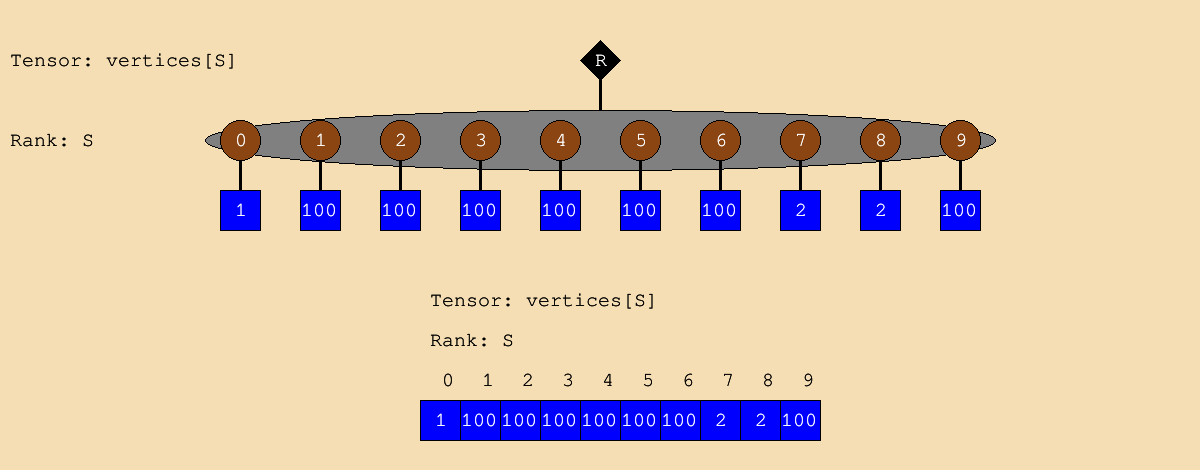

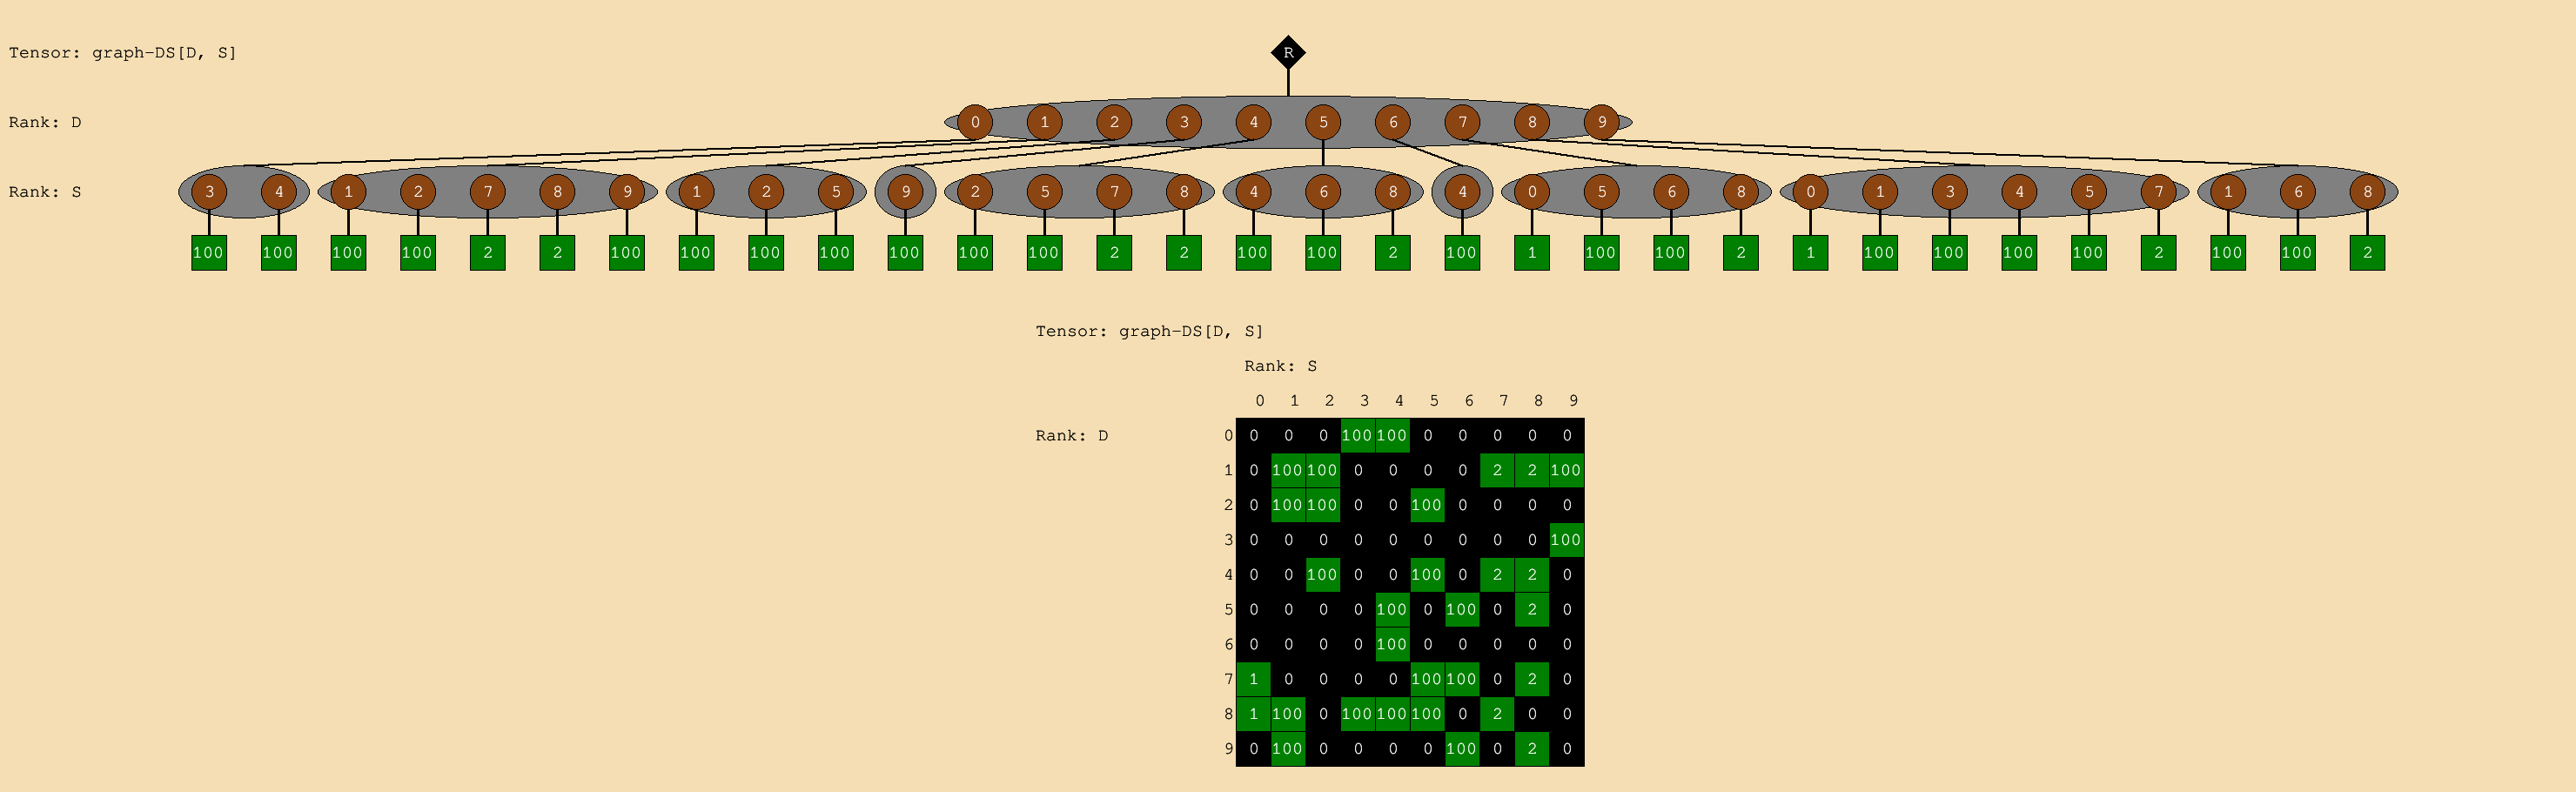

Generation: 1
Working on 3 to 0
Working on 4 to 0
Working on 2 to 1
Working on 7 to 1
Vertex 7 was closer to source so updating 1 to <3>
Working on 8 to 1
Vertex 8 was closer to source so updating 1 to <3>
Working on 9 to 1
Working on 1 to 2
Working on 5 to 2
Working on 9 to 3
Working on 2 to 4
Working on 5 to 4
Working on 7 to 4
Vertex 7 was closer to source so updating 4 to <3>
Working on 8 to 4
Vertex 8 was closer to source so updating 4 to <3>
Working on 4 to 5
Working on 6 to 5
Working on 8 to 5
Vertex 8 was closer to source so updating 5 to <3>
Working on 4 to 6
Working on 0 to 7
Working on 5 to 7
Working on 6 to 7
Working on 8 to 7
Working on 0 to 8
Working on 1 to 8
Working on 3 to 8
Working on 4 to 8
Working on 5 to 8
Working on 7 to 8
Working on 1 to 9
Working on 6 to 9
Working on 8 to 9
Vertex 8 was closer to source so updating 9 to <3>


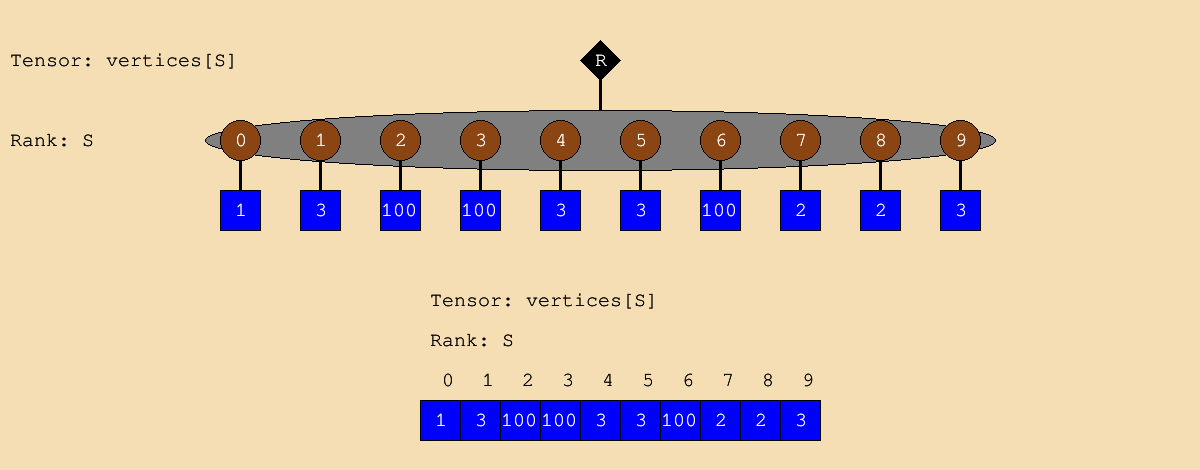

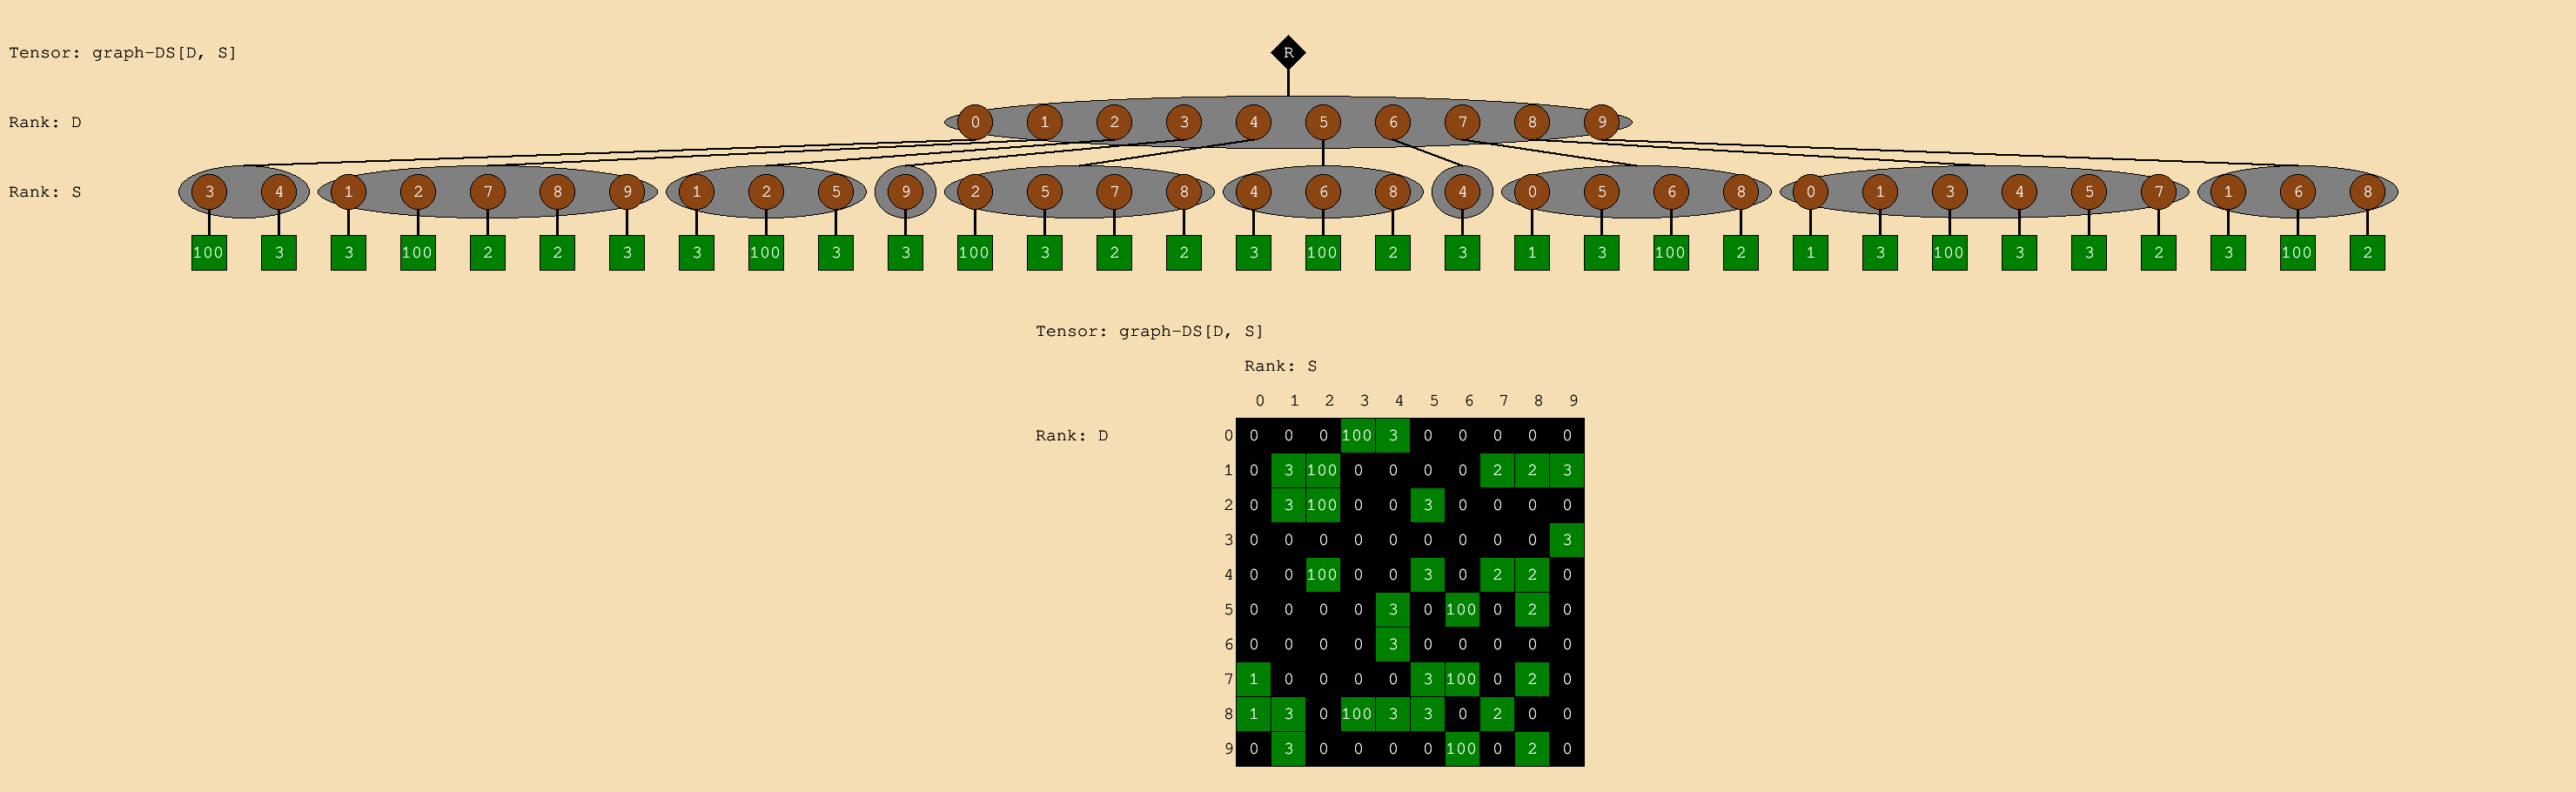

Generation: 2
Working on 3 to 0
Working on 4 to 0
Working on 2 to 1
Working on 7 to 1
Working on 8 to 1
Working on 9 to 1
Working on 1 to 2
Vertex 1 was closer to source so updating 2 to <4>
Working on 5 to 2
Vertex 5 was closer to source so updating 2 to <4>
Working on 9 to 3
Vertex 9 was closer to source so updating 3 to <4>
Working on 2 to 4
Working on 5 to 4
Working on 7 to 4
Working on 8 to 4
Working on 4 to 5
Working on 6 to 5
Working on 8 to 5
Working on 4 to 6
Vertex 4 was closer to source so updating 6 to <4>
Working on 0 to 7
Working on 5 to 7
Working on 6 to 7
Working on 8 to 7
Working on 0 to 8
Working on 1 to 8
Working on 3 to 8
Working on 4 to 8
Working on 5 to 8
Working on 7 to 8
Working on 1 to 9
Working on 6 to 9
Working on 8 to 9


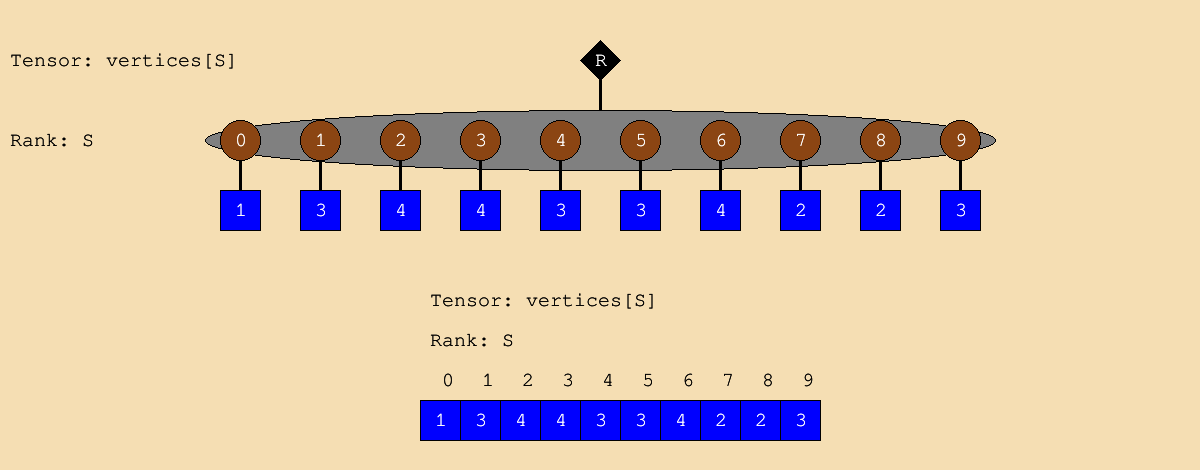

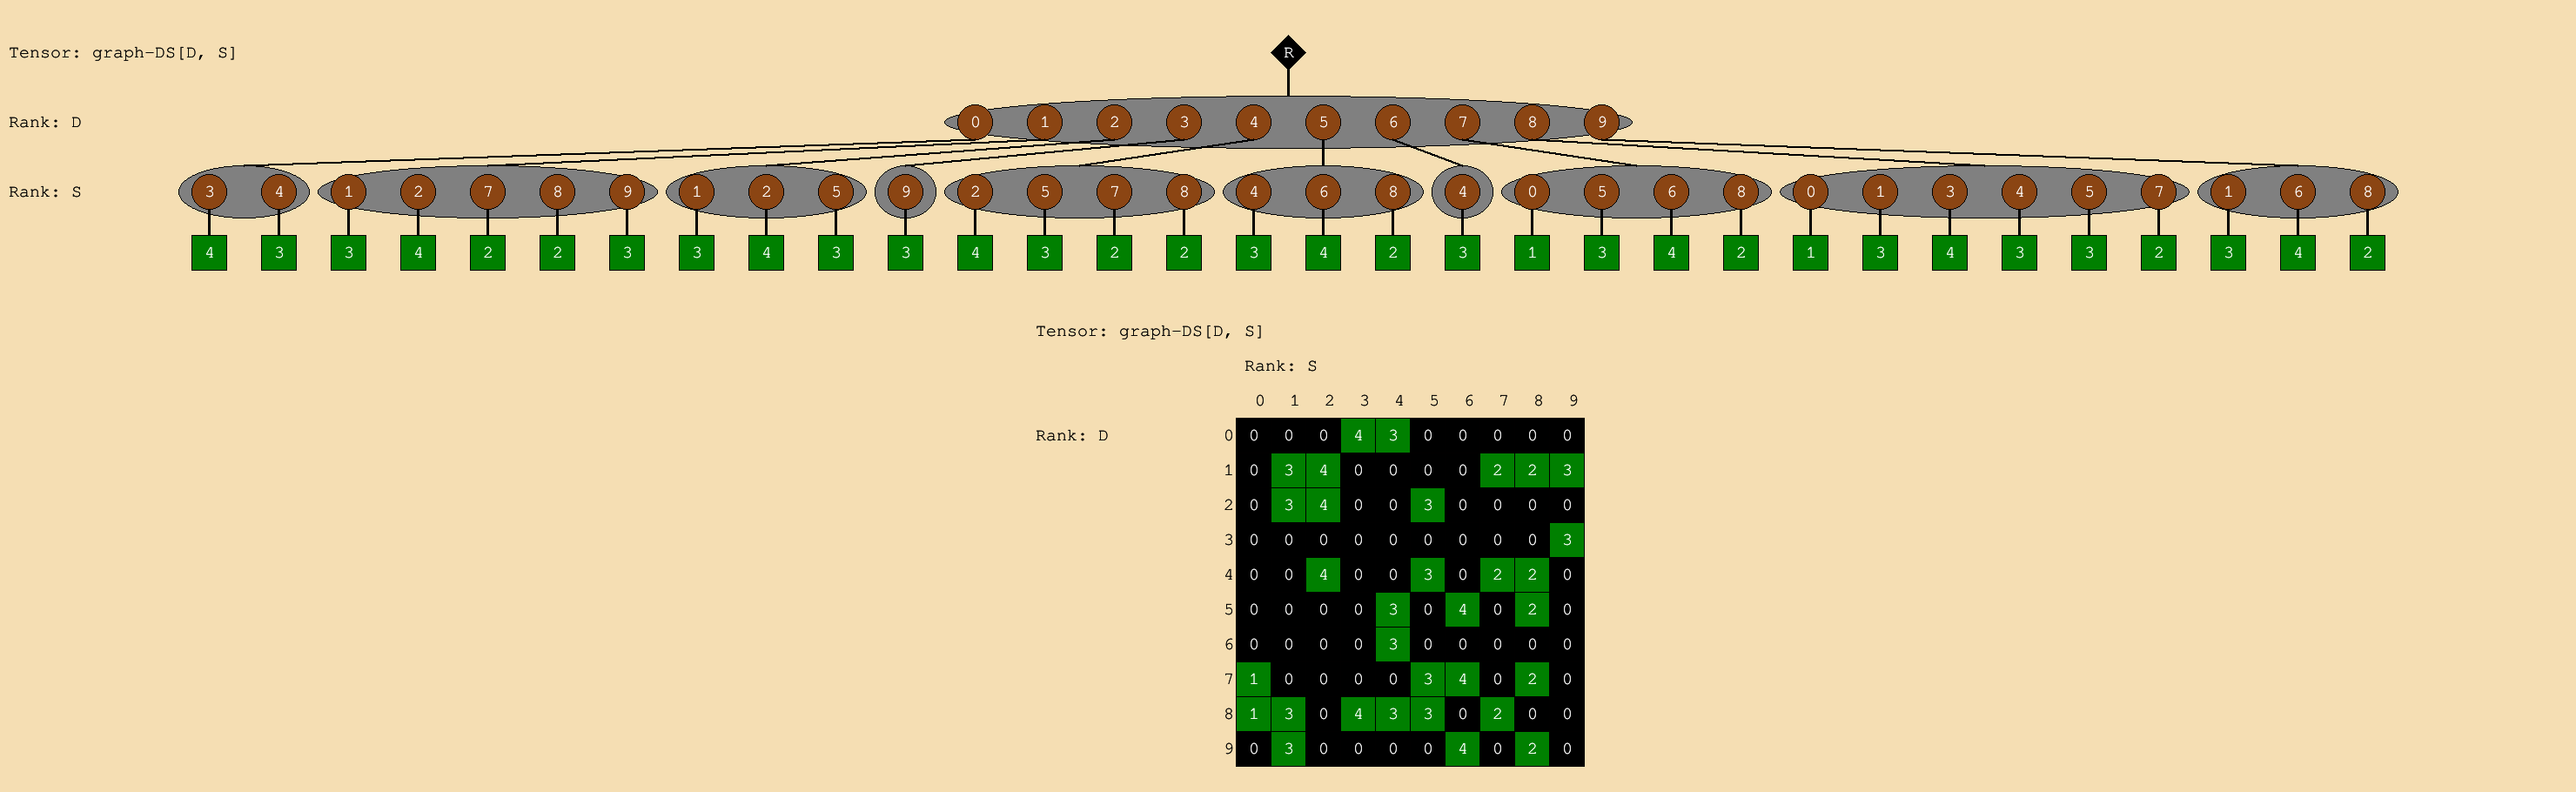

Generation: 3
Working on 3 to 0
Working on 4 to 0
Working on 2 to 1
Working on 7 to 1
Working on 8 to 1
Working on 9 to 1
Working on 1 to 2
Working on 5 to 2
Working on 9 to 3
Working on 2 to 4
Working on 5 to 4
Working on 7 to 4
Working on 8 to 4
Working on 4 to 5
Working on 6 to 5
Working on 8 to 5
Working on 4 to 6
Working on 0 to 7
Working on 5 to 7
Working on 6 to 7
Working on 8 to 7
Working on 0 to 8
Working on 1 to 8
Working on 3 to 8
Working on 4 to 8
Working on 5 to 8
Working on 7 to 8
Working on 1 to 9
Working on 6 to 9
Working on 8 to 9
No changes - terminating


In [14]:
def sssp_DS(vtx_val, g_val, r1=None, r0=None):

    print(f"Working on {r0} to {r1}")
    #new_vtx_val <<= min(g_val+1, vtx_val)
            
    if g_val+1 < vtx_val:
        print(f"Vertex {r0} was closer to source so updating {r1} to {g_val+1}")
        
        new_vtx_val  = g_val+1
        return new_vtx_val
    
    return None

            
vtx = Tensor.fromUncompressed(["S"], [1]+[100]*(S-1))
vtx.setMutable(True).setColor("blue")
vtx.setName("vertices")

scatter(g_DS, sm_DS)
displayTensor(vtx)
displayTensor(g_DS)

for n in range(10):
    print(f"Generation: {n}")
    changed = gather_apply(vtx, g_DS, sssp_DS)
    if not changed:
        print("No changes - terminating")
        break

    displayTensor(vtx)
    
    scatter(g_DS, sm_DS)
    displayTensor(g_DS)



## SSSP - SD form

In [15]:
def sssp_SD(vtx_val, g_val, r1=None, r0=None):

    print(f"Working on {r1} {vtx_val} to {r0} {g_val}")
    #new_vtx_val <<= min(g_val+1, vtx_val)
            
    if  g_val != 100 and vtx_val > g_val-1:
        print(f"Vertex {r0} was closer to destination so updating {r1} to {g_val-1}")
        
        new_vtx_val  = g_val-1
        return new_vtx_val
    
    return None
            
"""
Not working yet - please ignore

vtx = Tensor.fromUncompressed(["S"], [20]+[100]*(S-1))
vtx.setMutable(True).setColor("blue").setName("vertices")

scatter(g_SD, sm_SD)
displayTensor(vtx)
displayTensor(g_SD)

for n in range(10):
    print(f"Generation: {n}")
    changed = gather_apply(vtx, g_SD, sssp_SD)
    if not changed:
        print("No changes - terminating")
        break

    displayTensor(vtx)
    
    scatter(g_SD, sm_SD)
    displayTensor(g_SD)

"""

'\nNot working yet - please ignore\n\nvtx = Tensor.fromUncompressed(["S"], [20]+[100]*(S-1))\nvtx.setMutable(True).setColor("blue").setName("vertices")\n\nscatter(g_SD, sm_SD)\ndisplayTensor(vtx)\ndisplayTensor(g_SD)\n\nfor n in range(10):\n    print(f"Generation: {n}")\n    changed = gather_apply(vtx, g_SD, sssp_SD)\n    if not changed:\n        print("No changes - terminating")\n        break\n\n    displayTensor(vtx)\n    \n    scatter(g_SD, sm_SD)\n    displayTensor(g_SD)\n\n'

## Testing area

For running alternative algorithms